Topic:        Challenge Set 6  
Subject:      Linear Regression and Learning Curve challenges   
Date:         10/15/2018  
Name:         Emma Huang  

In [1]:
import pandas as pd
import numpy as np

import random
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Challenge 1  

In [2]:
# Generate (fake) data that is linearly related to log(x)
x = []
y = []
for i in range(1000):
    number = random.randint(1,500)
    x.append(number)
    y.append(2 + 6*math.log(number))

In [3]:
x = np.array(x)
y = np.array(y)

In [4]:
x = x.reshape(-1, 1)

In [5]:
# Try on linear model

In [6]:
m = LinearRegression()
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
m.score(x,y)

0.7622950036611147

In [8]:
# Fit a quadratic model

In [9]:
poly = PolynomialFeatures(degree=2)
x2 = poly.fit_transform(x)

In [10]:
m.fit(x2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
m.score(x2,y)

0.8972344950349868

In [12]:
# Fit a logarithmic model

In [13]:
log = lambda t: math.log(t)
x = np.array([log(xi) for xi in x])

In [14]:
x = x.reshape(-1, 1)

In [15]:
m = LinearRegression()
m.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
m.score(x,y)

1.0

# Challenge 2  

In [17]:
# Generate (fake) data
x = []
y = []
for i in range(1000):
    number = random.randint(1,500)
    x.append(number)
    y.append(2 + 6*number + 3*(number**2))

In [18]:
# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

In [19]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

In [20]:
#Fit a model to your training set
poly = PolynomialFeatures(degree=2)
x2 = poly.fit_transform(X_train)
x2_test = poly.fit_transform(X_test)

In [21]:
m.fit(x2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
m.score(x2,y_train)

1.0

In [23]:
m.score(x2_test,y_test)

1.0

In [24]:
# Calculate mean squared error on your training set
y_train_pred = m.predict(x2)
mean_squared_error(y_train, y_train_pred)

2.926885453064116e-21

In [25]:
# Calculate mean squared error on your test set
y_test_pred = m.predict(x2_test)
mean_squared_error(y_test, y_test_pred)

2.3782327179312796e-21

Overall, the mean squared error is larger on my test set, but both errors are very small

# Challenge 3
For the data from two (above), try polynomial fits from 0th (just constant) to 7th order (highest term x^7). Over the x axis of model degree (8 points), plot:

training error  
test error  
R squared  
AIC  

In [26]:
# 0th order
poly0 = PolynomialFeatures(degree=0)
x0 = poly0.fit_transform(X_train)
x0_test = poly0.fit_transform(X_test)

m.fit(x0,y_train)
y_train_pred = m.predict(x0)
training_error_0 = mean_squared_error(y_train, y_train_pred)

y_test_pred = m.predict(x0_test)
test_error_0 = mean_squared_error(y_test, y_test_pred)

r2_train_0 = m.score(x0,y_train)
r2_test_0 = m.score(x0_test,y_test)

In [27]:
# 1st order
poly1 = PolynomialFeatures(degree=1)
x1 = poly1.fit_transform(X_train)
x1_test = poly1.fit_transform(X_test)

m.fit(x1,y_train)
y_train_pred = m.predict(x1)
training_error_1 = mean_squared_error(y_train, y_train_pred)

y_test_pred = m.predict(x1_test)
test_error_1 = mean_squared_error(y_test, y_test_pred)

r2_train_1 = m.score(x1,y_train)
r2_test_1 = m.score(x1_test,y_test)

In [28]:
# 2nd order
poly2 = PolynomialFeatures(degree=2)
x2 = poly2.fit_transform(X_train)
x2_test = poly2.fit_transform(X_test)

m.fit(x2,y_train)
y_train_pred = m.predict(x2)
training_error_2 = mean_squared_error(y_train, y_train_pred)

y_test_pred = m.predict(x2_test)
test_error_2 = mean_squared_error(y_test, y_test_pred)

r2_train_2 = m.score(x2,y_train)
r2_test_2 = m.score(x2_test,y_test)

In [29]:
# 3rd order
poly3 = PolynomialFeatures(degree=3)
x3 = poly3.fit_transform(X_train)
x3_test = poly3.fit_transform(X_test)

m.fit(x3,y_train)
y_train_pred = m.predict(x3)
training_error_3 = mean_squared_error(y_train, y_train_pred)

y_test_pred = m.predict(x3_test)
test_error_3 = mean_squared_error(y_test, y_test_pred)

r2_train_3 = m.score(x3,y_train)
r2_test_3 = m.score(x3_test,y_test)

In [30]:
# 4th order
poly4 = PolynomialFeatures(degree=4)
x4 = poly4.fit_transform(X_train)
x4_test = poly4.fit_transform(X_test)

m.fit(x4,y_train)
y_train_pred = m.predict(x4)
training_error_4 = mean_squared_error(y_train, y_train_pred)

y_test_pred = m.predict(x4_test)
test_error_4 = mean_squared_error(y_test, y_test_pred)

r2_train_4 = m.score(x4,y_train)
r2_test_4 = m.score(x4_test,y_test)

In [31]:
# 5th order
poly5 = PolynomialFeatures(degree=5)
x5 = poly5.fit_transform(X_train)
x5_test = poly5.fit_transform(X_test)

m.fit(x5,y_train)
y_train_pred = m.predict(x5)
training_error_5 = mean_squared_error(y_train, y_train_pred)

y_test_pred = m.predict(x5_test)
test_error_5 = mean_squared_error(y_test, y_test_pred)

r2_train_5 = m.score(x5,y_train)
r2_test_5 = m.score(x5_test,y_test)

In [32]:
# 6th order
poly6 = PolynomialFeatures(degree=6)
x6 = poly6.fit_transform(X_train)
x6_test = poly6.fit_transform(X_test)

m.fit(x6,y_train)
y_train_pred = m.predict(x6)
training_error_6 = mean_squared_error(y_train, y_train_pred)

y_test_pred = m.predict(x6_test)
test_error_6 = mean_squared_error(y_test, y_test_pred)

r2_train_6 = m.score(x6,y_train)
r2_test_6 = m.score(x6_test,y_test)

In [33]:
# 7th order
poly7 = PolynomialFeatures(degree=7)
x7 = poly7.fit_transform(X_train)
x7_test = poly7.fit_transform(X_test)

m.fit(x7,y_train)
y_train_pred = m.predict(x7)
training_error_7 = mean_squared_error(y_train, y_train_pred)

y_test_pred = m.predict(x7_test)
test_error_7 = mean_squared_error(y_test, y_test_pred)

r2_train_7 = m.score(x7,y_train)
r2_test_7 = m.score(x7_test,y_test)

In [34]:
training_errors = [training_error_0,training_error_1,training_error_2,training_error_3,training_error_4,training_error_5,training_error_6,training_error_7]
test_errors = [test_error_0,test_error_1,test_error_2,test_error_3,test_error_4,test_error_5,test_error_6,test_error_7]
r2_train = [r2_train_0,r2_train_1,r2_train_2,r2_train_3,r2_train_4,r2_train_5,r2_train_6,r2_train_7]
r2_test = [r2_test_0,r2_test_1,r2_test_2,r2_test_3,r2_test_4,r2_test_5,r2_test_6,r2_test_7]

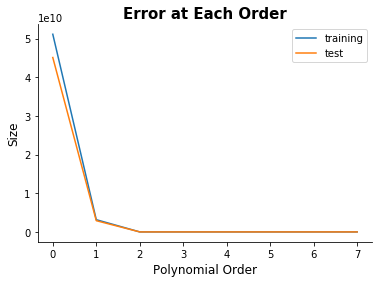

In [35]:
plt.plot(training_errors, label='training')
plt.plot(test_errors, label='test')

plt.title('Error at Each Order', fontsize = 15, weight = 'bold')
plt.ylabel('Size', fontsize = 12)
plt.xlabel('Polynomial Order', fontsize = 12)
plt.legend()
sns.despine();

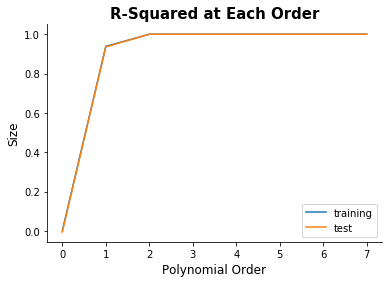

In [36]:
plt.plot(r2_train, label='training')
plt.plot(r2_test, label='test')

plt.title('R-Squared at Each Order', fontsize = 15, weight = 'bold')
plt.ylabel('Size', fontsize = 12)
plt.xlabel('Polynomial Order', fontsize = 12)
plt.legend()
sns.despine();

The initial errors are so much larger than the following ones that the following all appear to be the same on the graph, and the reverse for the r-sqared

# Challenge 4  

In [37]:
size = np.arange(5, 755, 5)

In [38]:
training_error = []
test_error = []
for item in size:
    x_data = X_train[0:item]
    y_data = y_train[0:item]
    m.fit(x_data,y_data)
    train_pred = m.predict(x_data)
    training_error.append(mean_squared_error(y_data, train_pred))
    test_pred = m.predict(X_test)
    test_error.append(mean_squared_error(y_test, test_pred))

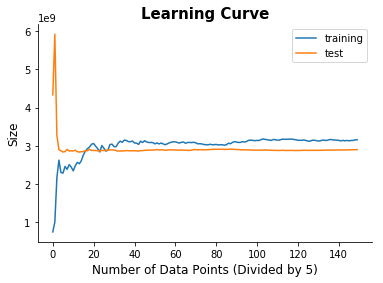

In [39]:
plt.plot(training_error, label='training')
plt.plot(test_error, label='test')

plt.title('Learning Curve', fontsize = 15, weight = 'bold')
plt.ylabel('Size', fontsize = 12)
plt.xlabel('Number of Data Points (Divided by 5)', fontsize = 12)
plt.legend()
sns.despine();